## Analisis de Temporadas de las principales ligas europeas

Se tiene una base de datos sql, donde se tienen tablas con información sobre las temporadas de las ligas europeas desde el 2009 al 2016. Los datos fueron descargados de la pagina https://www.kaggle.com/datasets/hugomathien/soccer

### Configuración Inicial

In [10]:
#Librerias generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [11]:
#Visualizar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)
#Ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

### Carga de Datos

Para la lectura de datos desde sql, se usa la libreria sqlalchemy para su carga en python.

In [108]:
#Lectura de datos sql
from sqlalchemy import create_engine
from sqlalchemy import inspect
#Pasos la lectura de la BD
engine = create_engine('sqlite:///C:\DataSets\Kaggle\Ligas Europeas\database.sqlite') #engine database

In [109]:
#Mostrar las tablas que existen dentro de la base de datos
inspector = inspect(engine)
schemas = inspector.get_schema_names()
for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        print(table_name)

schema: main
Country
League
Match
Player
Player_Attributes
Team
Team_Attributes
sqlite_sequence


In [17]:
#Carga de Datos
df_country = pd.read_sql_query('SELECT * FROM Country',engine)
df_league = pd.read_sql_query('SELECT * FROM League',engine)
df_match = pd.read_sql_query('SELECT * FROM Match',engine)
df_player = pd.read_sql_query('SELECT * FROM Player',engine)
df_player_attributes = pd.read_sql_query('SELECT * FROM Player_Attributes',engine)
df_team = pd.read_sql_query('SELECT * FROM Team',engine)
df_team_attributes = pd.read_sql_query('SELECT * FROM Team_Attributes',engine)

In [65]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [19]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Revision preliminar de datos

In [66]:
df_match_new = df_match.drop([ 'home_player_X1','home_player_X2', 'home_player_X3', 'home_player_X4','home_player_X5', 'home_player_X6', 'home_player_X7','home_player_X8', 'home_player_X9', 'home_player_X10','home_player_X11', 'away_player_X1', 'away_player_X2','away_player_X3', 'away_player_X4', 'away_player_X5','away_player_X6', 'away_player_X7', 'away_player_X8','away_player_X9', 'away_player_X10', 'away_player_X11','home_player_Y1', 'home_player_Y2', 'home_player_Y3','home_player_Y4', 'home_player_Y5', 'home_player_Y6','home_player_Y7', 'home_player_Y8', 'home_player_Y9','home_player_Y10', 'home_player_Y11', 'away_player_Y1','away_player_Y2', 'away_player_Y3', 'away_player_Y4','away_player_Y5', 'away_player_Y6', 'away_player_Y7','away_player_Y8', 'away_player_Y9', 'away_player_Y10','away_player_Y11','B365H','B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH','LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH','SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH','BSD', 'BSA'],axis=1)

In [67]:
df_match_new.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None


In [22]:
df_match.columns.ravel()

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [68]:
df_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [69]:
df_player_attributes.head(4)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [70]:
df_team.head(4)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK


In [71]:
df_team_attributes.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Verificacion de los valores nulos dentro del dataset

In [30]:
df_match_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   stage             25979 non-null  int64  
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   away_team_api_id  25979 non-null  int64  
 9   home_team_goal    25979 non-null  int64  
 10  away_team_goal    25979 non-null  int64  
 11  home_player_1     24755 non-null  float64
 12  home_player_2     24664 non-null  float64
 13  home_player_3     24698 non-null  float64
 14  home_player_4     24656 non-null  float64
 15  home_player_5     24663 non-null  float64
 16  home_player_6     24654 non-null  float6

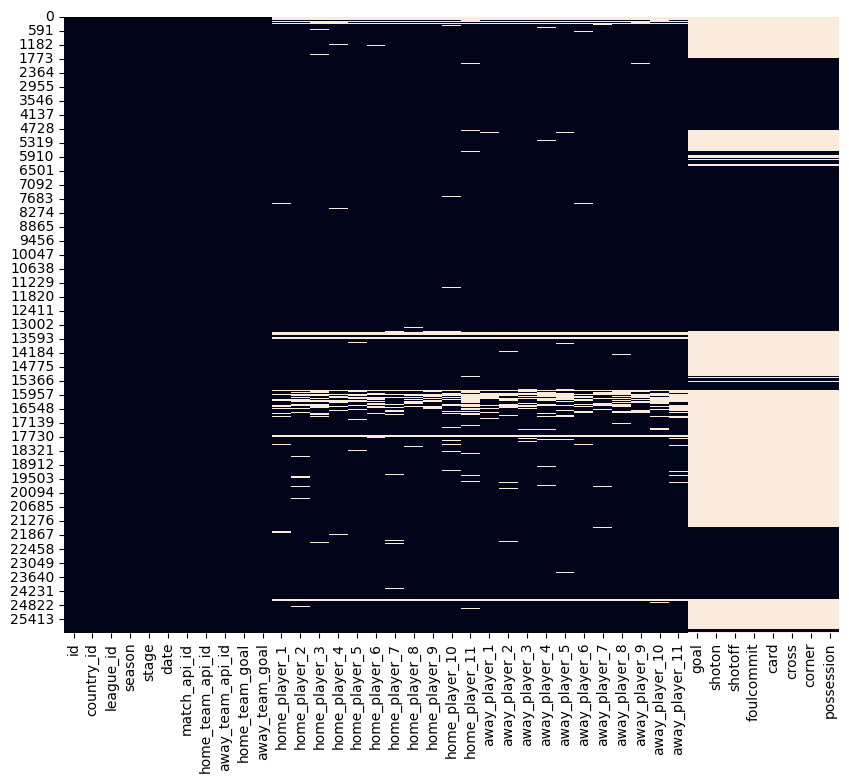

In [31]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_match_new.isnull(),cbar=False)
plt.show()

### Relaciones entre tablas - EDA Ligas Jugadas

Como la base de datos es relacional, se requiren hacer uniones entre las tablas para condensar la información para analisis posteriores. Data_Master viene a ser la union entre la data de los partidos (df_match) con los de los equipos (df_teams) y las ligas (df_leagues)

In [75]:
#Join entre data de partidos y la de las ligas
data_master = pd.merge(df_match_new,df_league,left_on='country_id',right_on='id',how='left') 

In [76]:
#Join entre data de partidos y datos de los equipos
data_master = pd.merge(data_master,df_team[['team_api_id','team_long_name']],left_on='home_team_api_id',right_on='team_api_id',how='left') #Equipos en partios de local
data_master.rename({'team_long_name':'home_team'},axis=1,inplace=True)
data_master = pd.merge(data_master,df_team[['team_api_id','team_long_name']],left_on='away_team_api_id',right_on='team_api_id',how='left') #Equipos en partidos de visita
data_master.rename({'team_long_name':'away_team'},axis=1,inplace=True)
data_master.rename({'name':'league'},axis=1,inplace=True) 
data_master.drop(['id_y','country_id_y','team_api_id_x','team_api_id_y'],axis=1,inplace=True)

In [37]:
data_master.head(8)

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league,home_team,away_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Tubize,Royal Excel Mouscron


### Analisis de datos de las temporadas por liga

Al tener la bd final de los equipos y resultados, se proceder a transformar los datos para visualizar los ganadores de cada temporada y liga

In [79]:
#Se extraen las columnas que son de interes para determinar los clubes ganadores de cada temporada
data_season = data_master[['season','date','match_api_id','home_team_goal','away_team_goal','league','home_team','away_team']]

In [80]:
l = [int(x[-4:]) for x in data_season['season']]
data_season['year'] = l

In [81]:
data_season.head()

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team,year
0,2008/2009,2008-08-17 00:00:00,492473,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2009
1,2008/2009,2008-08-16 00:00:00,492474,0,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2009
2,2008/2009,2008-08-16 00:00:00,492475,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2009
3,2008/2009,2008-08-17 00:00:00,492476,5,0,Belgium Jupiler League,KAA Gent,RAEC Mons,2009
4,2008/2009,2008-08-16 00:00:00,492477,1,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2009


Para determinar los ganadores de cada temporada,se realiza un calculo para definir los puntos obtenidos en cada partido

In [82]:
#Clasificar los puntos por partido ganado
#Para local
data_season.loc[(data_season['home_team_goal']>data_season['away_team_goal']),'home_result'] = 3
data_season.loc[(data_season['home_team_goal']==data_season['away_team_goal']),'home_result'] = 1
data_season.loc[(data_season['home_team_goal']<data_season['away_team_goal']),'home_result'] = 0

In [86]:
#Para visita
data_season.loc[(data_season['home_team_goal']<data_season['away_team_goal']),'away_result'] = 3
data_season.loc[(data_season['home_team_goal']==data_season['away_team_goal']),'away_result'] = 1
data_season.loc[(data_season['home_team_goal']>data_season['away_team_goal']),'away_result'] = 0
data_season.loc[data_season['away_result'],'away_result'] = data_season['away_result'].astype(int)

In [87]:
#Diferencia de goles
data_season['h_goaldiff'] = data_season['home_team_goal']-data_season['away_team_goal']
data_season['a_goaldiff'] = data_season['away_team_goal']-data_season['home_team_goal']

In [88]:
data_season.head()

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team,year,home_result,away_result,h_goaldiff,a_goaldiff
0,2008/2009,2008-08-17 00:00:00,492473,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2009,1.0,1,0,0
1,2008/2009,2008-08-16 00:00:00,492474,0,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2009,1.0,1,0,0
2,2008/2009,2008-08-16 00:00:00,492475,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2009,0.0,1,-3,3
3,2008/2009,2008-08-17 00:00:00,492476,5,0,Belgium Jupiler League,KAA Gent,RAEC Mons,2009,3.0,1,5,-5
4,2008/2009,2008-08-16 00:00:00,492477,1,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2009,0.0,1,-2,2


Creación de dos tablas con los puntos obtenidos de visita y como local y se concatenan par tener el formato tabular

In [89]:
#Datos de local
data_home= data_season[['year','date','league','home_team','home_result','h_goaldiff']]
data_home.rename({'home_team':'team','home_result':'points','h_goaldiff':'goals'},axis=1,inplace=True)
data_home['location'] = 'home'

In [90]:
#Datos de visita
data_away= data_season[['year','date','league','away_team','away_result','a_goaldiff']]
data_away.rename({'away_team':'team','away_result':'points','a_goaldiff':'goals'},axis=1,inplace=True)
data_away['location'] = 'away'

In [91]:
data_final_season = data_home.append(data_away) #Concatenación

In [93]:
data_final_season

,year,date,league,team,points,goals,location
0,2009,2008-08-17 00:00:00,Belgium Jupiler League,KRC Genk,1.0,0,home
1,2009,2008-08-16 00:00:00,Belgium Jupiler League,SV Zulte-Waregem,1.0,0,home
2,2009,2008-08-16 00:00:00,Belgium Jupiler League,KSV Cercle Brugge,0.0,-3,home
3,2009,2008-08-17 00:00:00,Belgium Jupiler League,KAA Gent,3.0,5,home
4,2009,2008-08-16 00:00:00,Belgium Jupiler League,FCV Dender EH,0.0,-2,home
...,...,...,...,...,...,...,...
25974,2016,2015-09-22 00:00:00,Switzerland Super League,FC Thun,0.0,-1,away
25975,2016,2015-09-23 00:00:00,Switzerland Super League,FC Luzern,0.0,1,away
25976,2016,2015-09-23 00:00:00,Switzerland Super League,FC Sion,0.0,-2,away
25977,2016,2015-09-22 00:00:00,Switzerland Super League,FC Zürich,0.0,0,away


En base a lo anterior, se agrupan los datos para obtener sus puntos totales por temporada y liga

In [52]:
data_result = data_final_season.groupby(['year','league','team'])['points','goals'].sum()

In [53]:
data_result = data_result.sort_values(['year','league','points','goals'],ascending=False)

In [56]:
data_result = data_result.reset_index()

In [57]:
data_result.head()

,year,league,team,points,goals
0,2016,Switzerland Super League,FC Basel,44.0,50
1,2016,Switzerland Super League,BSC Young Boys,40.0,31
2,2016,Switzerland Super League,FC Sion,35.0,3
3,2016,Switzerland Super League,Grasshopper Club Zürich,30.0,9
4,2016,Switzerland Super League,FC Luzern,29.0,9


In [94]:
#Ejempo de la liga belga en el 2016
data_result[(data_result['year']==2016)&(data_result['league']=='Belgium Jupiler League')]

,year,league,team,points,goals
172,2016,Belgium Jupiler League,Club Brugge KV,57.0,34
173,2016,Belgium Jupiler League,RSC Anderlecht,50.0,22
174,2016,Belgium Jupiler League,KAA Gent,49.0,27
175,2016,Belgium Jupiler League,KRC Genk,49.0,12
176,2016,Belgium Jupiler League,KV Oostende,47.0,11
177,2016,Belgium Jupiler League,KV Kortrijk,44.0,-4
178,2016,Belgium Jupiler League,Standard de Liège,41.0,-10
179,2016,Belgium Jupiler League,SV Zulte-Waregem,40.0,1
180,2016,Belgium Jupiler League,KV Mechelen,40.0,-2
181,2016,Belgium Jupiler League,Sporting Charleroi,37.0,-3


In [95]:
#Datos de años y ligas
year = data_result['year'].unique()
year = year.tolist()
leagues = data_result['league'].unique()
leagues =  leagues.tolist()

In [102]:
#Creación del dataframe de equipos ganadores por liga
df_win = pd.DataFrame({
    'year':[],
    'league':[],
    'team':[],
    'points':[],
    'goals':[]
})

In [103]:
for i in year:
    for j in leagues:
        df_win = pd.concat([df_win,data_result[(data_result['year']==i)&(data_result['league']==j)].iloc[0:1,:]])

In [104]:
df_win

,year,league,team,points,goals
0,2016.0,Switzerland Super League,FC Basel,44.0,50.0
10,2016.0,Spain LIGA BBVA,FC Barcelona,49.0,83.0
30,2016.0,Scotland Premier League,Celtic,46.0,62.0
42,2016.0,Portugal Liga ZON Sagres,SL Benfica,45.0,66.0
60,2016.0,Poland Ekstraklasa,Piast Gliwice,53.0,13.0
...,...,...,...,...,...
1382,2009.0,Italy Serie A,Inter,66.0,38.0
1402,2009.0,Germany 1. Bundesliga,VfL Wolfsburg,66.0,39.0
1420,2009.0,France Ligue 1,Girondins de Bordeaux,66.0,30.0
1440,2009.0,England Premier League,Manchester United,69.0,44.0


<Axes: xlabel='count', ylabel='team'>

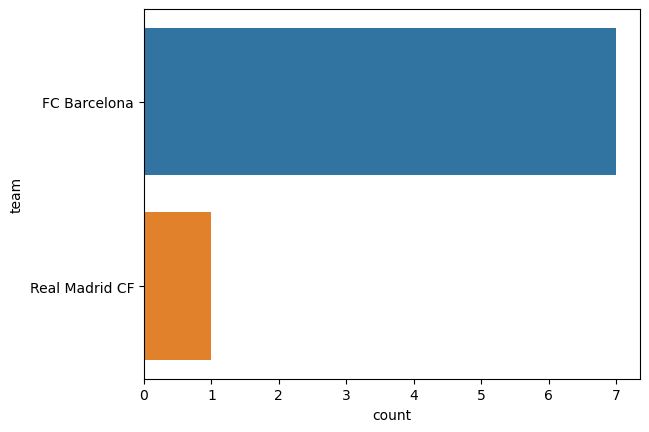

In [106]:
#Ejemplo liga española
sns.countplot(y=df_win['team'][df_win['league']=='Spain LIGA BBVA'])

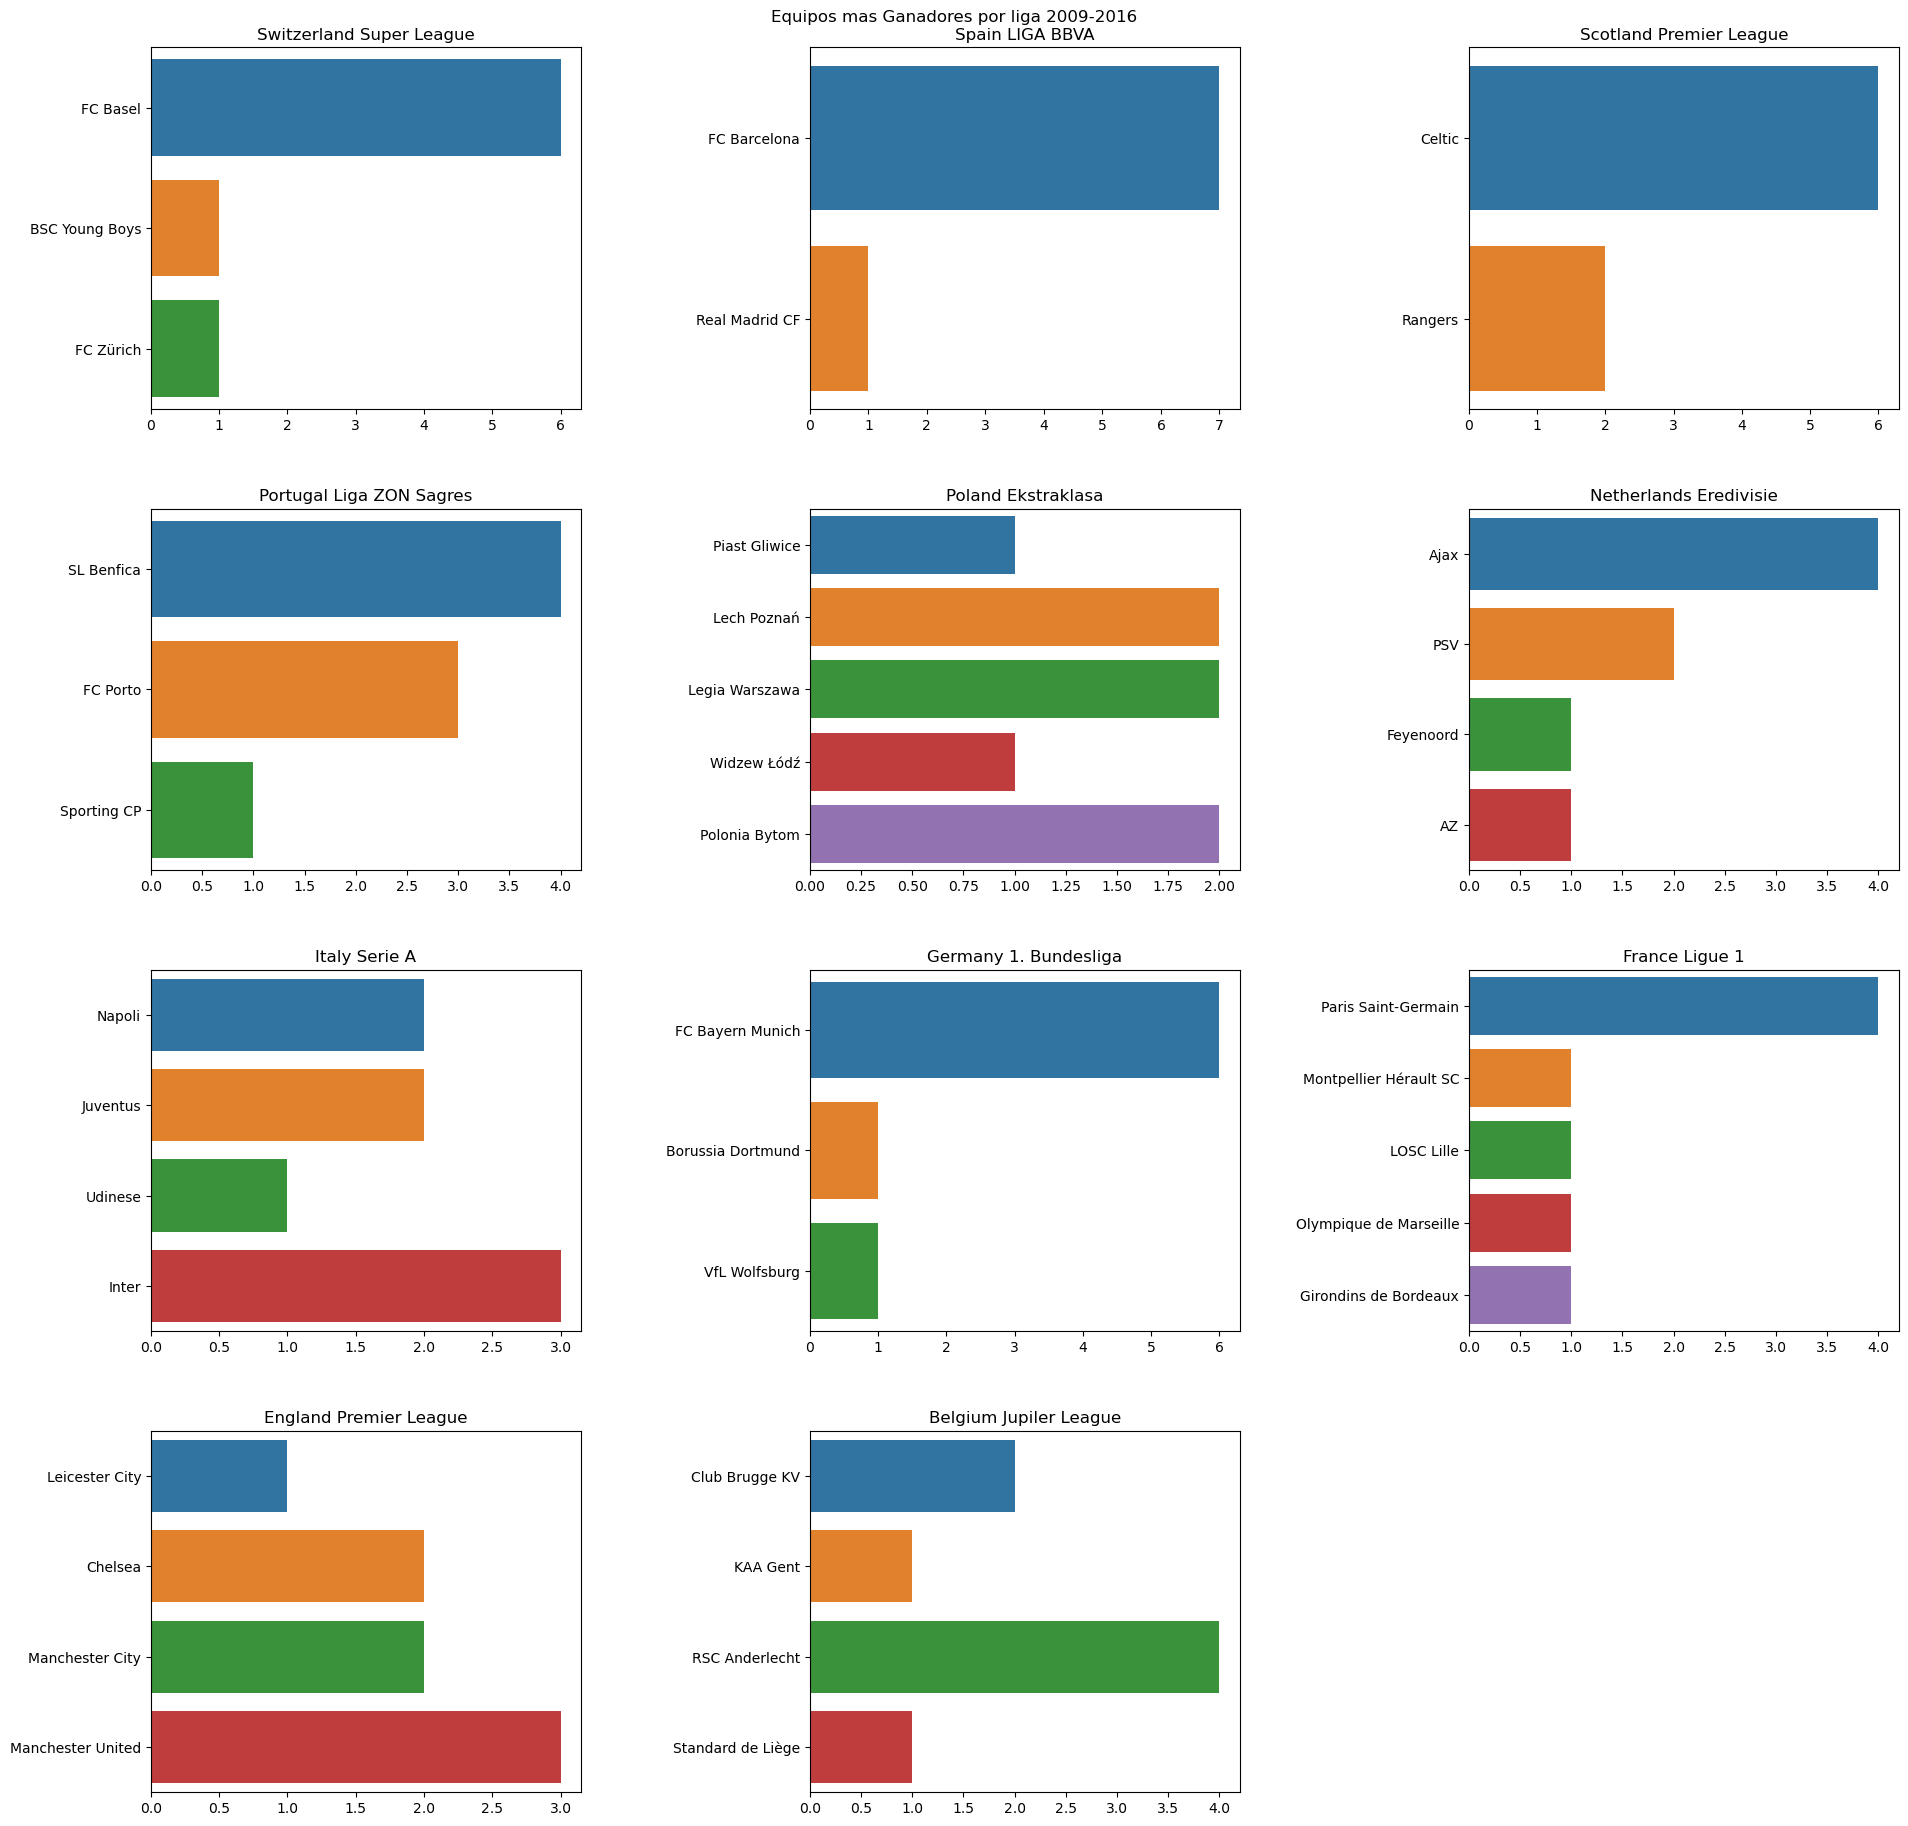

In [107]:
fig = plt.figure(figsize=(20,19))
for i in range(len(leagues)):
    ax = plt.subplot(4,3,i+1)
    sns.countplot(y=df_win['team'][df_win['league']==leagues[i]],ax=ax)
    ax.set(xlabel=None,ylabel=None)
    ax.set_title(leagues[i])
fig.tight_layout(pad=4.0)
fig.suptitle('Equipos mas Ganadores por liga 2009-2016')
plt.show()

### Definicion del campeonato

#### Analisis de con cuantas fechas de anticipacion se ha definido la liga en la temporada

In [ ]:
data_final_season.head(5) 

,year,date,league,team,points,goals,location
0,2009,2008-08-17 00:00:00,Belgium Jupiler League,KRC Genk,1.0,0,home
1,2009,2008-08-16 00:00:00,Belgium Jupiler League,SV Zulte-Waregem,1.0,0,home
2,2009,2008-08-16 00:00:00,Belgium Jupiler League,KSV Cercle Brugge,0.0,-3,home
3,2009,2008-08-17 00:00:00,Belgium Jupiler League,KAA Gent,3.0,5,home
4,2009,2008-08-16 00:00:00,Belgium Jupiler League,FCV Dender EH,0.0,-2,home


In [ ]:
# Se quiere agrupar las fechas de los partidos segun cada fecha de la temporada

In [ ]:
#Lista de fechas de la liga belga temporada 2009
t_fechas = data_final_season[(data_final_season['year']==2009)&(data_final_season['league']=='Belgium Jupiler League')]['date'].sort_values().unique()

In [ ]:
t_fechas = pd.to_datetime(t_fechas)

In [ ]:
# Diferencia de dias entre los dias minimos con los demas dias
dif_days = np.absolute([(np.min(t_fechas)-i).days for i in t_fechas])

In [ ]:
df_fechas = pd.DataFrame({
    'fechas' : t_fechas,
    'diferencia' : dif_days})

In [ ]:
df_fechas

,fechas,diferencia
0,2008-08-16,0
1,2008-08-17,1
2,2008-08-23,7
3,2008-08-24,8
4,2008-08-29,13
...,...,...
91,2009-05-03,260
92,2009-05-08,265
93,2009-05-09,266
94,2009-05-15,272


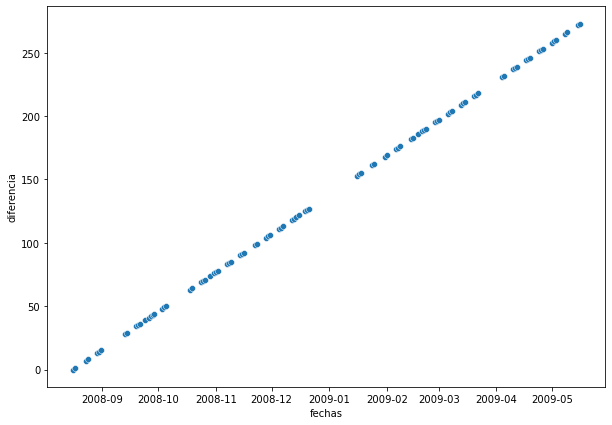

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(df_fechas.fechas,df_fechas.diferencia)
plt.show()

#### Proceso de clustering